# PacketPatrolAI - AI based Network Attack Detection

Luca Di Bello (luca.dibello@student.supsi.ch) - SUPSI - 2021

## Useful information

The dataset used for this project is written in the NetFlow V9 format (format by Cisco, documentation available [here](https://www.cisco.com/en/US/technologies/tk648/tk362/technologies_white_paper09186a00800a3db9.html)). The dataset is composed by two files:

* **train_set**: ~2 million flows, used for training the model
* **test_set**: ~4 million flows, used for testing the model

## Columns description

* **FLOW_ID**: Unique identifier of the packet flow
* **PROTOCOL_MAP**: Protocol used by the flow (udp, tcp, icmp, gre, skip, ipv6-icmp, ipv6)
* **L4_SRC_PORT**: Layer 4 source port (0-65535)
* **IPV4_SRC_ADDR**: IPv4 Source IP address (format: xxx.xxx.xxx.xxx)
* **L4_DST_PORT**: Layer 4 destination port (0-65535)
* **IPV4_DST_ADDR**: IPv4 Destination IP address (format: xxx.xxx.xxx.xxx)
* 
* **ALERT**: (*only in test set*) The kind of attack that has been detected on the current flow. This are the possible values:
  - **None**: No attack has been detected
  - **Port scanning**: The flow is a port scanning attack 
  - **Denial of Service**: The flow is a DoS attack
  - **Malware**: The flow is a malware attack





## 1. Loading the datasets

In [5]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
# Loading the data from the train and test files
train_df = pd.read_csv('data/train_net.csv')
test_df = pd.read_csv('data/test_net.csv')

## 2. Data Preprocessing

In [14]:
# Show information about the data
def printInfo(df):
    print('Dataframe shape: ', df.shape)
    print('Dataframe columns: ', df.columns)

print('==== Train data ====')
printInfo(train_df)
print()
print('==== Test data ====')
printInfo(test_df)

==== Train data ====
Dataframe shape:  (2077339, 32)
Dataframe columns:  Index(['FLOW_ID', 'PROTOCOL_MAP', 'L4_SRC_PORT', 'IPV4_SRC_ADDR',
       'L4_DST_PORT', 'IPV4_DST_ADDR', 'FIRST_SWITCHED',
       'FLOW_DURATION_MILLISECONDS', 'LAST_SWITCHED', 'PROTOCOL', 'TCP_FLAGS',
       'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'TCP_WIN_MIN_IN',
       'TCP_WIN_MIN_OUT', 'TCP_WIN_MSS_IN', 'TCP_WIN_SCALE_IN',
       'TCP_WIN_SCALE_OUT', 'SRC_TOS', 'DST_TOS', 'TOTAL_FLOWS_EXP',
       'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 'TOTAL_PKTS_EXP', 'TOTAL_BYTES_EXP',
       'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'ANALYSIS_TIMESTAMP',
       'ANOMALY', 'ID'],
      dtype='object')

==== Test data ====
Dataframe shape:  (4217625, 33)
Dataframe columns:  Index(['FLOW_ID', 'PROTOCOL_MAP', 'L4_SRC_PORT', 'IPV4_SRC_ADDR',
       'L4_DST_PORT', 'IPV4_DST_ADDR', 'FIRST_SWITCHED',
       'FLOW_DURATION_MILLISECONDS', 'LAST_SWITCHED', 'PROTOCOL', 'TCP_FLAGS',
       'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'TCP_WI

In [32]:
train_df.head()

,FLOW_ID,PROTOCOL_MAP,L4_SRC_PORT,IPV4_SRC_ADDR,L4_DST_PORT,IPV4_DST_ADDR,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,...,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ANALYSIS_TIMESTAMP,ANOMALY,ALERT,ID
0,372018590,udp,53950,10.114.232.40,53,10.114.226.5,1647760833,1,1647760833,17,...,0,0,165,2,275,2,1647760873,0.0,None,0
1,368604472,tcp,37914,10.114.241.166,38303,10.114.224.218,1647686725,1,1647686725,6,...,0,0,44,1,40,1,1647687338,0.0,Port Scanning,1
2,367513992,tcp,33216,10.114.241.166,18757,10.114.224.116,1647680044,0,1647680044,6,...,0,0,44,1,40,1,1647680115,1.0,Port Scanning,2
3,371997670,udp,48627,10.114.225.205,53,10.114.226.5,1647760172,0,1647760172,17,...,0,0,128,2,160,2,1647760207,0.0,None,3
4,374311119,udp,35939,10.114.225.205,53,10.114.226.5,1647780916,0,1647780916,17,...,0,0,172,2,300,2,1647780984,0.0,None,4


## 3. Data Analysis

### 3.1. Observing the distribution of the target variable

<AxesSubplot: xlabel='ALERT', ylabel='count'>

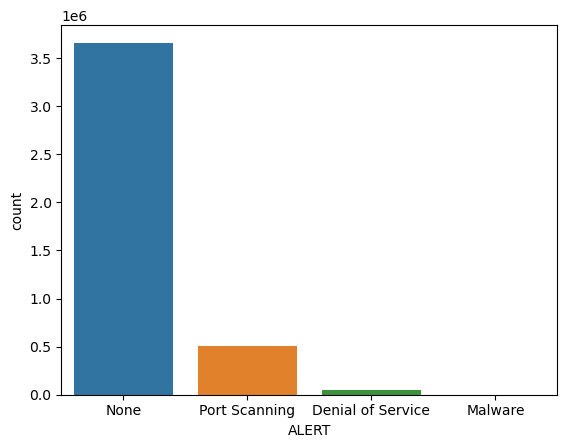

In [38]:
# Show the distribution of the target variable
sns.countplot(x='ALERT', data=train_df)

ValueError: Could not interpret input 'DIRECTION'

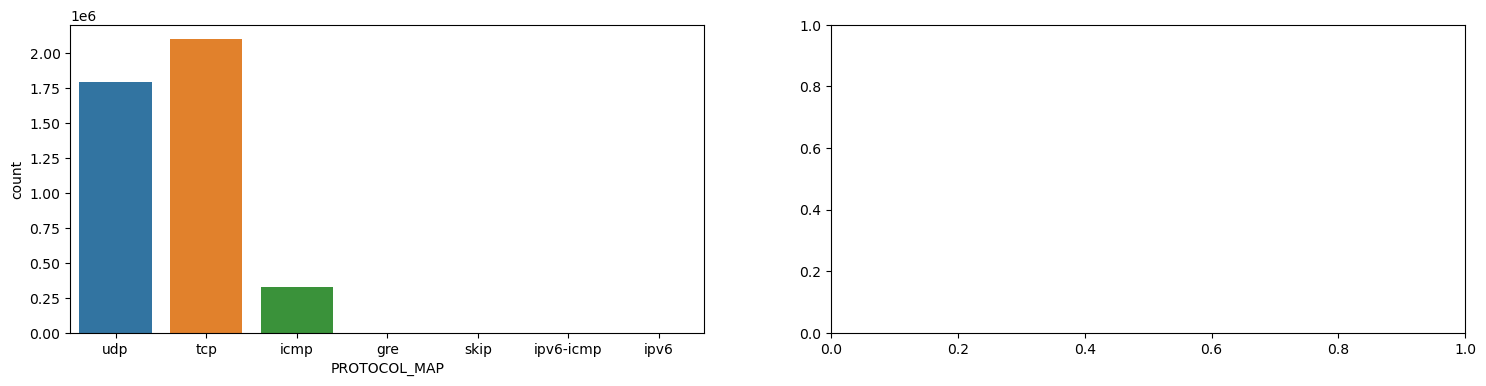

In [42]:
# Distribution of the important features in the same plot
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.countplot(x='PROTOCOL_MAP', data=train_df, ax=ax[0])
sns.countplot(x='DIRECTION', data=train_df, ax=ax[1])
sns.countplot(x='PROTOCOL_MAP', data=train_df)
